Import all necessary libraries

In [98]:
#For the dataframe and array manipulation
import pandas as pd
import numpy as np

#For visualization
import plotly
import plotly.express as px
import matplotlib.pyplot as plt


Import all needed sklearn functions

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Read in the CSV and see what it looks like

We'll use a diabetes dataset for this demo

In [100]:
URL = 'https://raw.githubusercontent.com/ishaandey/node/master/week-8/workshop/diabetes.csv'
df = pd.read_csv(URL)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Split the data into the train and test data

What column should be the y?

In [101]:
X = df.drop(columns=['Outcome'])
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Train the KNN model for different values of k (1-50 every 3 values).

Evaluate the accuracy of the model and find the error. See how the error for the training data and testing data compares to each other and where the error is lowest.

We'll graph both the training and testing error so make sure to store them.

In [106]:
k = list(range(1, 50, 3))
train_error = []
test_error = []
for i in k:
  classifier = KNeighborsClassifier(n_neighbors=i)

  # Fitting the model
  classifier.fit(X_train, y_train)

  y_pred_train = classifier.predict(X_train)

  accuracy_train = 100-accuracy_score(y_train, y_pred_train)*100
  train_error.append(round(accuracy_train, 2))

  y_pred_test = classifier.predict(X_test)

  accuracy_test = 100-accuracy_score(y_test, y_pred_test)*100
  test_error.append(round(accuracy_test, 2))

  print('k =', str(i), 'train error', round(accuracy_train, 2), 'test error', round(accuracy_test, 2))


k = 1 train error 0.0 test error 32.47
k = 4 train error 19.06 test error 29.22
k = 7 train error 20.68 test error 31.17
k = 10 train error 21.01 test error 23.38
k = 13 train error 21.01 test error 22.73
k = 16 train error 21.5 test error 22.08
k = 19 train error 22.48 test error 24.68
k = 22 train error 23.62 test error 25.97
k = 25 train error 23.94 test error 28.57
k = 28 train error 24.43 test error 26.62
k = 31 train error 24.59 test error 27.92
k = 34 train error 24.1 test error 24.03
k = 37 train error 24.76 test error 25.97
k = 40 train error 25.57 test error 25.97
k = 43 train error 25.24 test error 27.92
k = 46 train error 26.38 test error 27.27
k = 49 train error 26.22 test error 27.27


Graph the training error and testing error for k from 1 to 50 (every three values) to see how their graphs compare. 

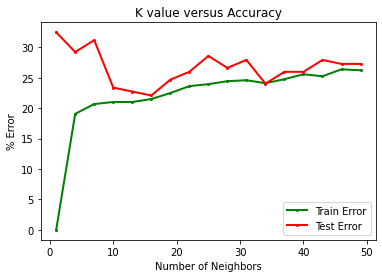

In [107]:
plt.plot(k, train_error,'go-', linewidth=2, markersize=2, label="Train Error")
plt.plot(k, test_error,'ro-', linewidth=2, markersize=2, label="Test Error")
plt.xlabel('Number of Neighbors')
plt.ylabel('% Error')
plt.title('K value versus Accuracy')
plt.legend()
plt.show()

This graph represents the bias variance tradeoff.

At a k less than the lowest point of the test error, the model is underfitted and is too simple for the data we're training on. At a k greater than the lowest point of the test error, the model is overfitted and tries to capture patterns specific to the train data.